# Assignment: Exploratory Data Analysis
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

*** Answered question 1 on separate paper attached to assignment's github folder

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

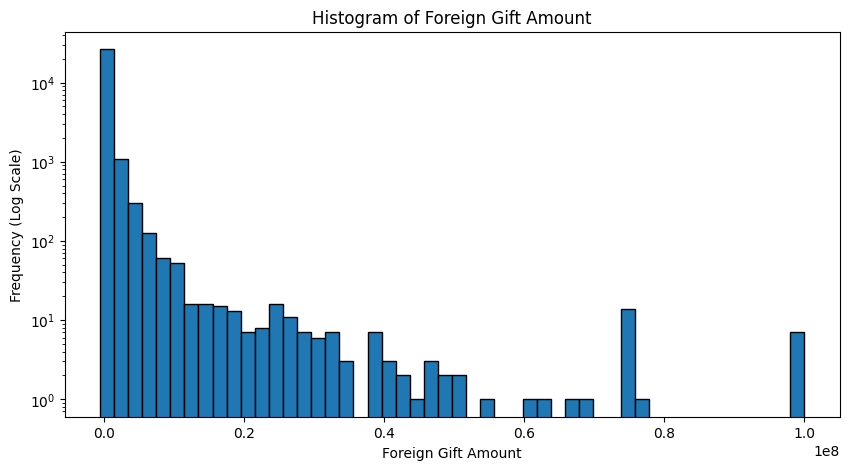

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [8]:
#1 and 2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df = pd.read_csv('ForeignGifts_edu.csv')
df["Foreign Gift Amount"] = pd.to_numeric(df["Foreign Gift Amount"], errors="coerce")

plt.figure(figsize=(10, 5))
plt.hist(df["Foreign Gift Amount"].dropna(), bins=50, edgecolor='black', log=True)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency (Log Scale)")
plt.title("Histogram of Foreign Gift Amount")
plt.show()

df["Foreign Gift Amount"].describe()

Findings: The mean gift amount is approximately 588,232 dollars, but the standard deviation is very high, indicating large variability. The median gift amount is $94,615, significantly lower than the mean, suggesting a right-skewed distribution. The histogram confirms that most foreign gifts are relatively small, but a few very large values create a long tail in the distribution.

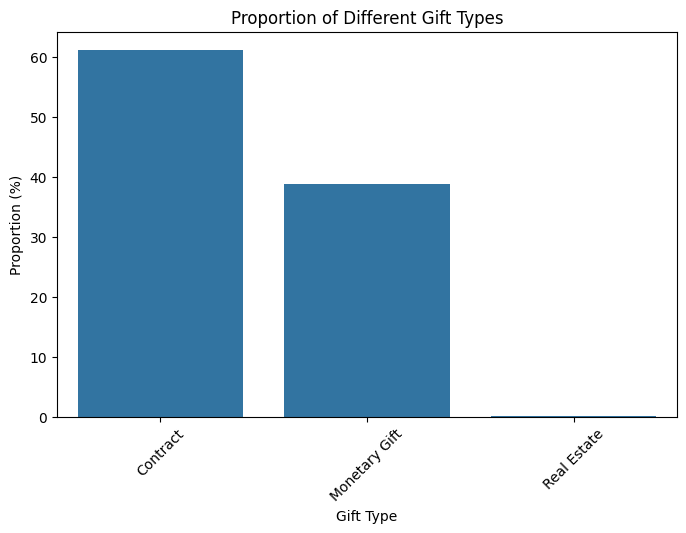

,proportion
Gift Type,
Contract,61.209737
Monetary Gift,38.751285
Real Estate,0.038978


In [10]:
# 3
gift_type_counts = df["Gift Type"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=gift_type_counts.index, y=gift_type_counts.values)
plt.xlabel("Gift Type")
plt.ylabel("Proportion (%)")
plt.title("Proportion of Different Gift Types")
plt.xticks(rotation=45)
plt.show()

gift_type_counts

Contracts make up 61.21% of all gifts, monetary gifts account for 38.75%, and real estate gifts are extremely rare, comprising only 0.04% of total foreign gifts.

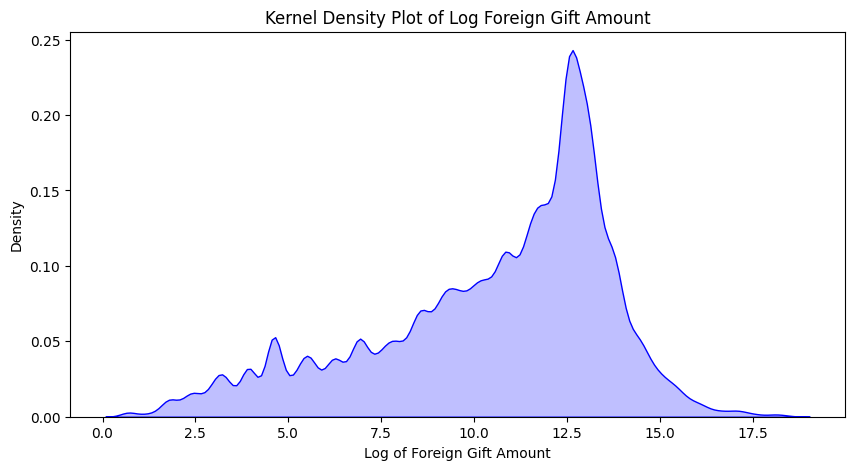

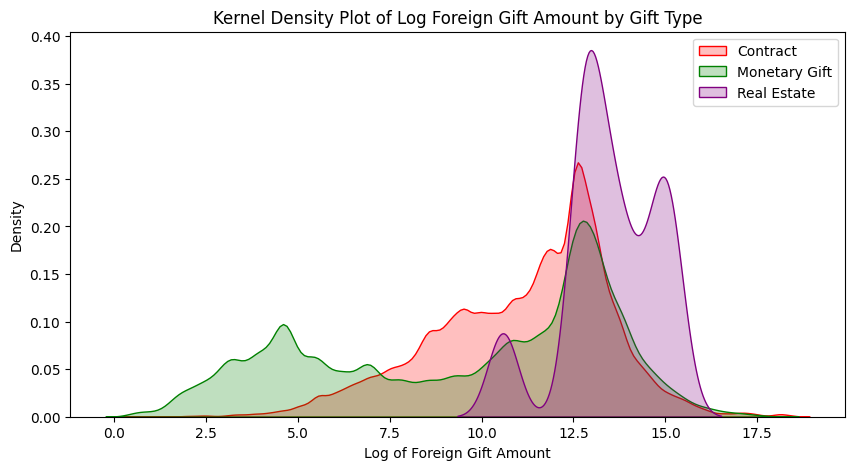

In [12]:
# 4
df_valid = df[df["Foreign Gift Amount"] > 0].copy()

df_valid["Log Foreign Gift Amount"] = np.log1p(df_valid["Foreign Gift Amount"])

plt.figure(figsize=(10, 5))
sns.kdeplot(df_valid["Log Foreign Gift Amount"], color="blue", bw_adjust=0.5, fill=True)
plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Log Foreign Gift Amount")
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(df_valid[df_valid["Gift Type"] == "Contract"]["Log Foreign Gift Amount"], label="Contract", color="red", bw_adjust=0.5, fill=True)
sns.kdeplot(df_valid[df_valid["Gift Type"] == "Monetary Gift"]["Log Foreign Gift Amount"], label="Monetary Gift", color="green", bw_adjust=0.5, fill=True)
sns.kdeplot(df_valid[df_valid["Gift Type"] == "Real Estate"]["Log Foreign Gift Amount"], label="Real Estate", color="purple", bw_adjust=0.5, fill=True)
plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Log Foreign Gift Amount by Gift Type")
plt.legend()
plt.show()

Patterns: The distribution is right-skewed, meaning most gifts are relatively small, with a few very large ones. Contracts show a broader distribution, implying higher variability in contract values.
Monetary gifts are more concentrated in the mid-range but still have a significant spread.
Real estate gifts are less frequent and lower in value compared to other types.

In [18]:
# 5
top_countries_by_gifts = df["Country of Giftor"].value_counts().head(15)
top_countries_by_amount = df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

top_countries_gifts_df = pd.DataFrame({"Country": top_countries_by_gifts.index, "Number of Gifts": top_countries_by_gifts.values})
top_countries_amount_df = pd.DataFrame({"Country": top_countries_by_amount.index, "Total Amount Given": top_countries_by_amount.values})
display(top_countries_gifts_df)
display(top_countries_amount_df)

,Country,Number of Gifts
0,ENGLAND,3655
1,CHINA,2461
2,CANADA,2344
3,JAPAN,1896
4,SWITZERLAND,1676
5,SAUDI ARABIA,1610
6,FRANCE,1437
7,GERMANY,1394
8,HONG KONG,1080
9,SOUTH KOREA,811


,Country,Total Amount Given
0,QATAR,2706240869
1,ENGLAND,1464906771
2,CHINA,1237952112
3,SAUDI ARABIA,1065205930
4,BERMUDA,899593972
5,CANADA,898160656
6,HONG KONG,887402529
7,JAPAN,655954776
8,SWITZERLAND,619899445
9,INDIA,539556490


,Institution,Total Amount Received
0,Carnegie Mellon University,1477922504
1,Cornell University,1289937761
2,Harvard University,954803610
3,Massachusetts Institute of Technology,859071692
4,Yale University,613441311
5,Texas A&M University,521455050
6,Johns Hopkins University,502409595
7,Northwestern University,402316221
8,Georgetown University,379950511
9,University of Chicago (The),364544338


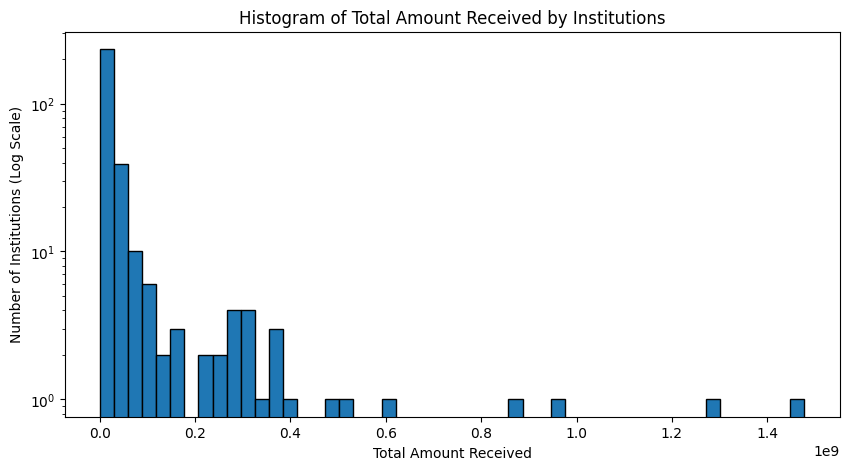

In [19]:
# 6
top_institutions = df.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
top_institutions_df = pd.DataFrame({"Institution": top_institutions.index, "Total Amount Received": top_institutions.values})
display(top_institutions_df)

plt.figure(figsize=(10, 5))
plt.hist(df.groupby("Institution Name")["Foreign Gift Amount"].sum(), bins=50, edgecolor='black', log=True)
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions (Log Scale)")
plt.title("Histogram of Total Amount Received by Institutions")
plt.show()


In [21]:
# 7
top_giftors = df.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(10)
top_giftors_df = pd.DataFrame({"Giftor Name": top_giftors.index, "Total Amount Given": top_giftors.values})
display(top_giftors_df)

,Giftor Name,Total Amount Given
0,Qatar Foundation,1166503744
1,Qatar Foundation/Qatar National Res,796197000
2,Qatar Foundation for Education,373945215
3,Anonymous,338793629
4,Saudi Arabian Cultural Mission,275221475
5,HCL,190000000
6,Church of Jesus Christ of LDS,185203715
7,Emirates Institute for Advanced Sc,170641244
8,QIC,148355497
9,Anonymous #9,96334996


**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [23]:
# 1
drilling_rigs_df = pd.read_csv("drilling_rigs.csv")

drilling_rigs_info = drilling_rigs_df.info()
drilling_rigs_head = drilling_rigs_df.head()

display(drilling_rigs_info)
display(drilling_rigs_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

None

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


Number of Observations: 623 rows.

Number of Variables: 10 columns.

The Month column is stored as an object and should be converted to a datetime format. Several columns that should be numeric are stored as objects, likely due to the presence of non-numeric values such as "Not Available". Steps to clean the data would be to convert the Month column to datetime format, replace "Not Available" with NaN in the affected columns, convert the affected columns from object to numeric format, check for missing values and decide on an appropriate handling method.

In [25]:
# 2
drilling_rigs_df['time'] = pd.to_datetime(drilling_rigs_df['Month'], format='mixed')
drilling_rigs_df[['Month', 'time']].head()

,Month,time
0,1973 January,1973-01-01
1,1973 February,1973-02-01
2,1973 March,1973-03-01
3,1973 April,1973-04-01
4,1973 May,1973-05-01


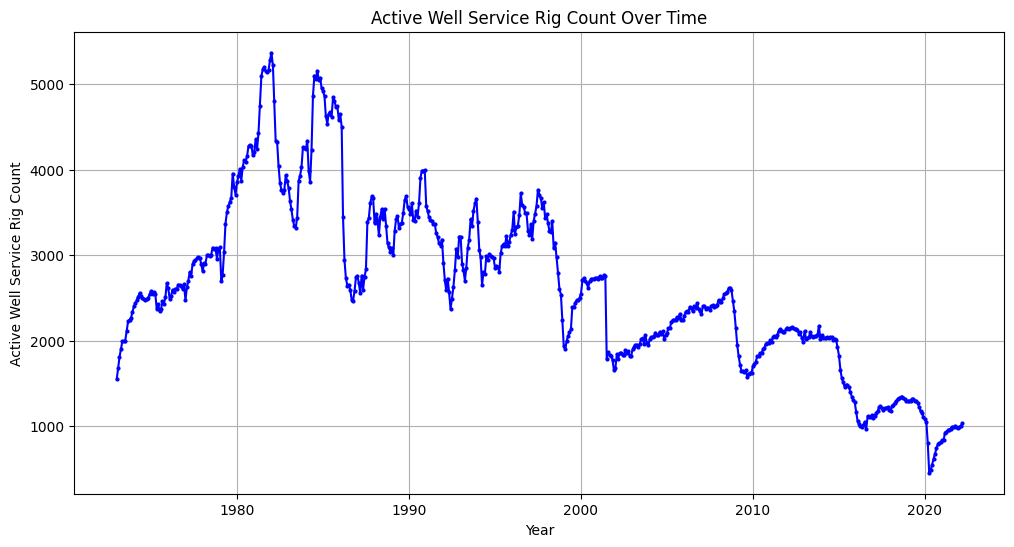

In [26]:
# 3
drilling_rigs_df["Active Well Service Rig Count (Number of Rigs)"] = pd.to_numeric(
    drilling_rigs_df["Active Well Service Rig Count (Number of Rigs)"], errors="coerce")

plt.figure(figsize=(12, 6))
plt.plot(drilling_rigs_df["time"], drilling_rigs_df["Active Well Service Rig Count (Number of Rigs)"], marker='o', linestyle='-', color='blue', markersize=2)
plt.xlabel("Year")
plt.ylabel("Active Well Service Rig Count")
plt.title("Active Well Service Rig Count Over Time")
plt.grid(True)
plt.show()

The active well service rig count shows significant fluctuations over time, with periods of rapid increase followed by sharp declines. These trends likely correspond to economic cycles, oil price changes, or shifts in energy policy. Notable peaks and dips suggest major industry events that influenced rig activity.

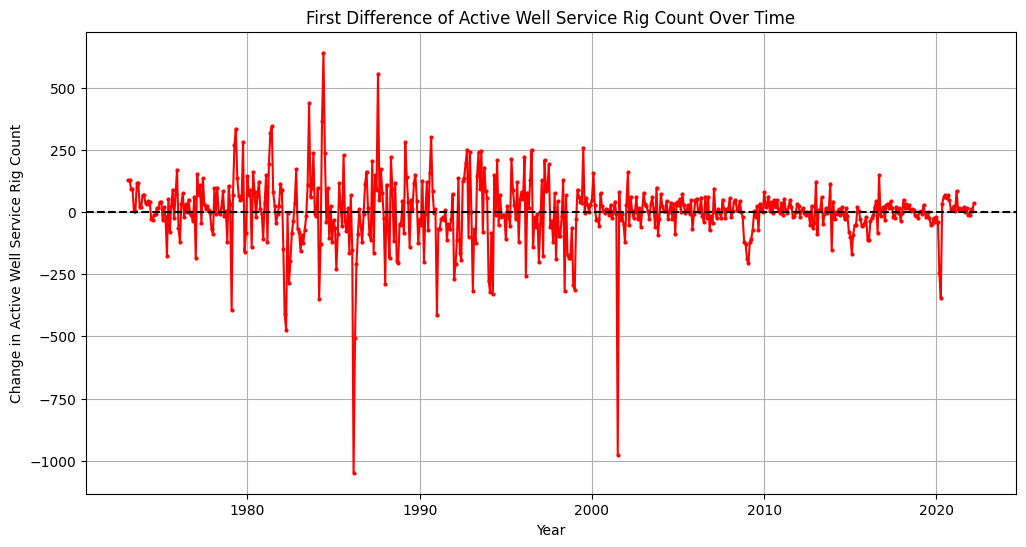

In [28]:
# 4
drilling_rigs_df["Rig Count Change"] = drilling_rigs_df["Active Well Service Rig Count (Number of Rigs)"].diff()

plt.figure(figsize=(12, 6))
plt.plot(drilling_rigs_df["time"], drilling_rigs_df["Rig Count Change"], marker='o', linestyle='-', color='red', markersize=2)
plt.xlabel("Year")
plt.ylabel("Change in Active Well Service Rig Count")
plt.title("First Difference of Active Well Service Rig Count Over Time")
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.show()

The first-difference plot shows frequent fluctuations, indicating that changes in rig counts occur in sudden shifts rather than gradual trends. There are sharp positive and negative spikes, likely reflecting economic cycles, oil price volatility, or policy changes affecting drilling activity. Some periods show relative stability, but overall, the data suggests a highly reactive industry.

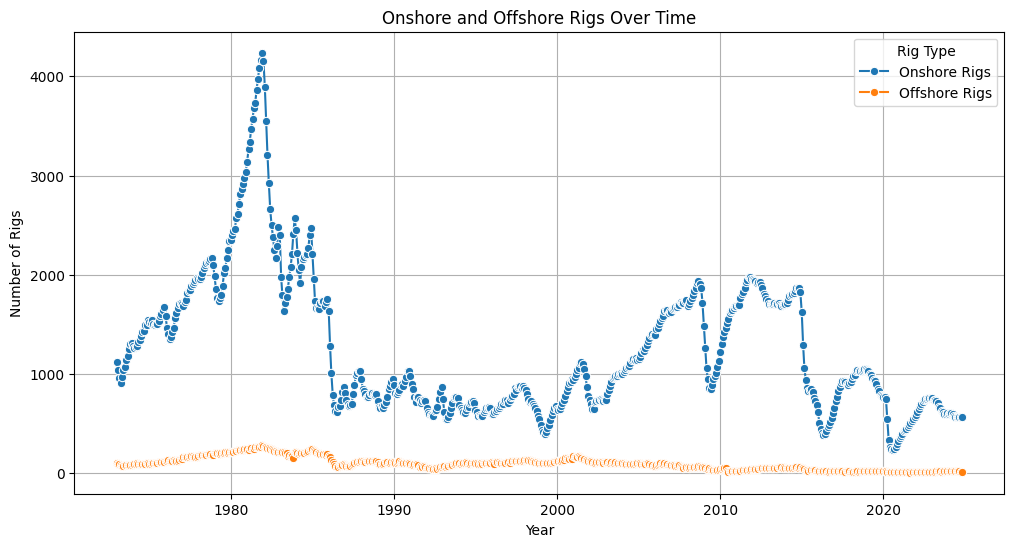

In [29]:
# 5
melted_df = drilling_rigs_df.melt(
    id_vars=["time"],
    value_vars=[
        "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",
        "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",],
    var_name="Rig Type",
    value_name="Number of Rigs",)

melted_df["Rig Type"] = melted_df["Rig Type"].replace({
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)": "Onshore Rigs",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)": "Offshore Rigs",})

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x="time", y="Number of Rigs", hue="Rig Type", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Rigs")
plt.title("Onshore and Offshore Rigs Over Time")
plt.legend(title="Rig Type")
plt.grid(True)
plt.show()